In [1]:
%cd /home/josh/PycharmProjects/Muon_magnets

/home/josh/PycharmProjects/Muon_magnets


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

import modules.functions as func
from modules.muon import Muon
from modules.ensemble import Ensemble

from modules.dipole import Dipole
from modules.island import Island
from modules.grid import Grid
#from modules.field_grid import make_field
from modules.multi_process import MP_fields
from modules.model_equations import static_GKT

%matplotlib inline

#### Used to create grid of points to calculte field at
In the final code the field will instead be calcualted for each muon using the muons x,y,z position

In [3]:
def setup_field(width, height, nx, ny):
    """
    :param tuple max_loc: (X, Y) of furthest dipole
    :param float edge_buffer: Distance around edge of grid to calculate field for
    :param int nx: Number of field x points
    :param int ny: Number of field y points
    :rtype: dict
    :return: Dictionary containing coordinates for a field over the dipole array
    """
    edge_buffer_x = width/10
    edge_buffer_y = height/10
    # Determine region to calculate field lines/plot over
    field_region = [[(-width/2) - edge_buffer_x, (width/2) + edge_buffer_x],
                    [(-height/2) - edge_buffer_y, (height/2) + edge_buffer_y]]
    field_locations = {"x_vals": np.linspace(*field_region[0], nx),
                       "y_vals": np.linspace(*field_region[1], ny)}
    return field_locations

In [ ]:
def calculate_field(xlocs, ylocs, grid):
    
    x_len, y_len = len(x_locs), len(y_locs)
    Ex = np.zeros([x_len, y_len])
    Ey = np.zeros([x_len, y_len])
    
    for i, x in enumerate(x_locs):
    print(f"{i}/{len(x_locs)} started...")
    for j, y in enumerate(y_locs):
        for isle in island_grid.islands:
            ex, ey, _ = isle.get_mag_field([x, y, 10e-6])
            Ex[j][i] += ex
            Ey[j][i] += ey
    return Ex, Ey

In [4]:
field_locations = setup_field(60e-6, 60e-6, 200, 200)
x_locs = field_locations["x_vals"]
y_locs = field_locations["y_vals"]

In [5]:
island_grid = Grid()

Setting up grid parameters...
Creating islands...
Saving islands...
Saving pickle to data/15X15_U_6/grid_obj.pickle
Finished.


## Calculate resultant field over the whole grid

In [7]:
calculate_field(x_locs, y_locs)

0.0 started...
0.005 started...
0.01 started...
0.015 started...
0.02 started...
0.025 started...
0.03 started...
0.035 started...
0.04 started...
0.045 started...
0.05 started...
0.055 started...
0.06 started...
0.065 started...
0.07 started...
0.075 started...
0.08 started...
0.085 started...
0.09 started...
0.095 started...
0.1 started...
0.105 started...
0.11 started...
0.115 started...
0.12 started...
0.125 started...
0.13 started...
0.135 started...
0.14 started...
0.145 started...
0.15 started...
0.155 started...
0.16 started...
0.165 started...
0.17 started...
0.175 started...
0.18 started...
0.185 started...
0.19 started...
0.195 started...
0.2 started...
0.205 started...
0.21 started...
0.215 started...
0.22 started...
0.225 started...
0.23 started...
0.235 started...
0.24 started...
0.245 started...
0.25 started...
0.255 started...
0.26 started...
0.265 started...
0.27 started...
0.275 started...
0.28 started...
0.285 started...
0.29 started...
0.295 started...
0.3 started..

## Plotting

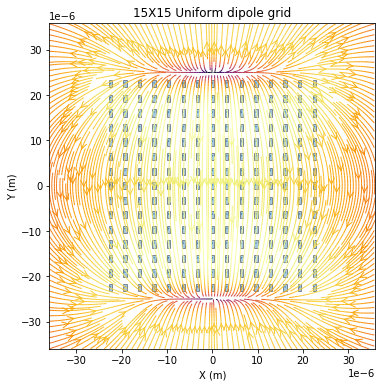

In [9]:
color = 2 * np.log(np.hypot(Ex, Ey))

fig, ax = plt.subplots(figsize=(8, 6))
ax.streamplot(x_locs, y_locs, Ex, Ey,
              color=color,
              linewidth=1,
              cmap=plt.cm.inferno,
              density=4,
              arrowstyle='->',
              arrowsize=1.5)
ax.set_aspect("equal")
for isle in island_grid.islands:
  ax.add_artist(isle.get_outline())
  ax.add_artist(isle.get_moment_arrow())


ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_title("15X15 Uniform dipole grid")

ax.set_xlim(min(x_locs), max(x_locs))
ax.set_ylim(min(y_locs), max(y_locs))
ax.ticklabel_format(axis="both", style="sci", scilimits=(-6, -6))
plt.show()